---
title: "텍스트 네트워크 분석"
author: "Sungil Park"
date: "2024-10-21"
description: "예시에용~"
image: "data/text_network.png"
format: 
  html:
    toc: true
---

# 패키지

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import matplotlib.font_manager as fm
import pandas as pd
import operator
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정 

(설치 위치에 따라 다를 수 있음)

In [3]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 데이터

In [4]:
text = """
인공지능은 컴퓨터 과학의 한 분야로, 인간의 학습능력과 추론능력, 지각능력, 자연언어의 이해능력 등을 컴퓨터 프로그램으로 실현한 기술이다. 
인공지능은 머신 러닝과 딥 러닝 기술을 포함하며, 빅데이터와 결합하여 다양한 분야에서 혁신을 이끌고 있다.
"""

# 데이터 전처리

명사만 추출

In [5]:
okt = Okt()
words = okt.nouns(text)
word_count = Counter(words)
words[:5]

['인공', '지능', '컴퓨터', '과학', '분야']

# 단어 간 관계 분석

In [6]:
G = nx.Graph()
for i in range(len(words)-1):
    G.add_edge(words[i], words[i+1])

# 시각화

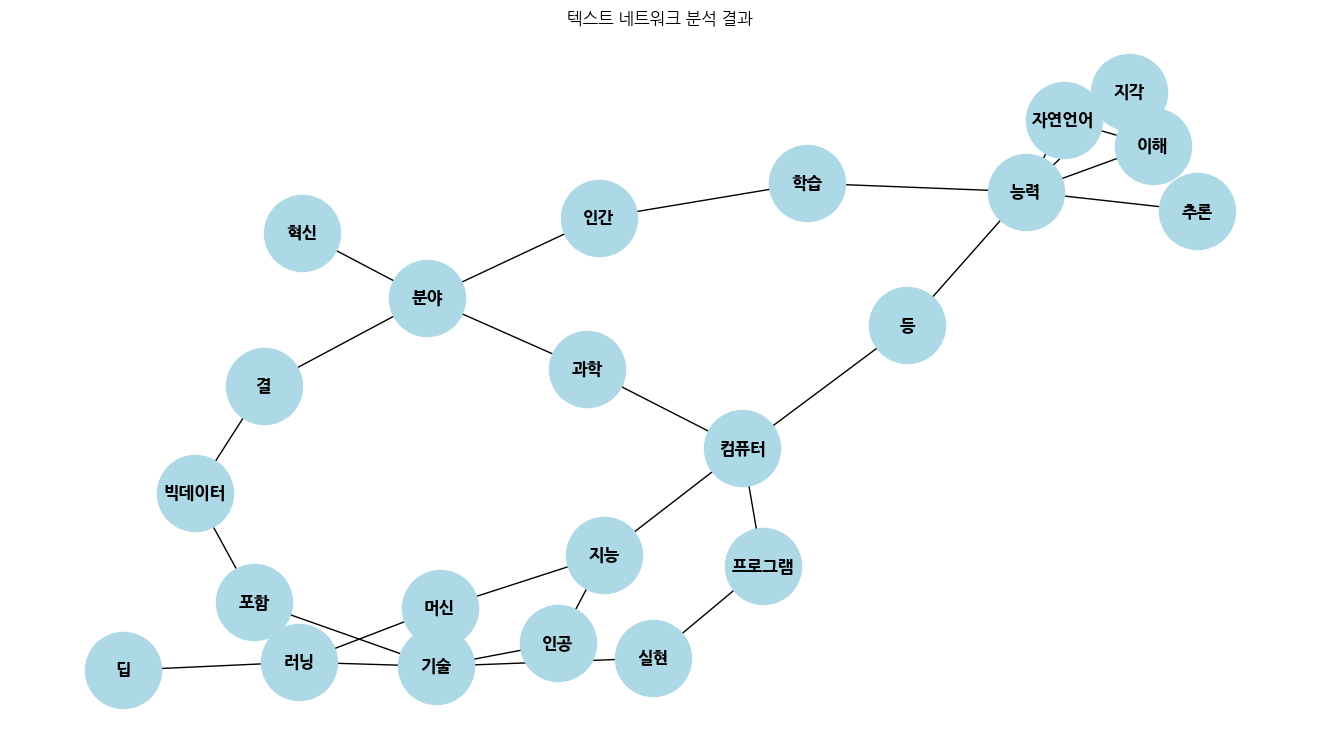

In [16]:
plt.figure(figsize=(13,7))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', font_family=font_prop.get_name())
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("텍스트 네트워크 분석 결과", fontsize=16, fontproperties=font_prop)
plt.axis('off')
plt.tight_layout()
plt.show()

# 중심성 분석

## 연결중심성

In [8]:
degree_centrality = nx.degree_centrality(G)
pd.DataFrame(sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True),columns=["word", "degree_centrality"])

,word,degree_centrality
0,능력,0.272727
1,컴퓨터,0.181818
2,분야,0.181818
3,기술,0.181818
4,지능,0.136364
5,러닝,0.136364
6,인공,0.090909
7,과학,0.090909
8,인간,0.090909
9,학습,0.090909


## 매개중심성

In [9]:
betweenness_centrality = nx.betweenness_centrality(G)
pd.DataFrame(sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True),columns=["word", "degree_centrality"])

,word,degree_centrality
0,컴퓨터,0.439394
1,능력,0.379509
2,등,0.268398
3,분야,0.257576
4,지능,0.238095
5,기술,0.155123
6,과학,0.127706
7,인간,0.121212
8,학습,0.119769
9,러닝,0.110390


# 해석

- 가장 많은 연결을 가진 노드는 텍스트에서 중심적인 개념을 가짐
- 노드 간 연결 패턴을 통해 어떤 개념들이 관련되어 있는지 알 수 있다.

- **연결 중심성**
  - 각 노드가 다른 노드들과 얼마나 많이 직접 연결되어 있는지를 나타낸다.
  - 값이 높을수록 해당 단어가 텍스트에서 다른 단어들과 자주 함께 사용된다.

- **매개 중심성**
  - 노드가 다른 노드들 사이의 최단 경로에 위치하는 정도를 나타낸다.
  - 값이 높을수록 해당 단어가 서로 다른 개념을 연결하는 중요한 역할을 함을 의미한다.